<a href="https://colab.research.google.com/github/vgutierrezmendivil/NeuralNetworks/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente.

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.


**Autores:** Sergio Gonzalez, Victoria Gutierrez y Cecilia Sanseverino

### Respuestas

#### Punto 1)

La derivada analítica de la función $f(x) = 2x^2 + x + 4$ es $f'(x)= 4x + 1$


Para encontrar el mínimo, debemos igualar la función a cero ($f'(x) = 0$).

Despejando, obtenemos el siguiente valor: $$x = − \frac{1}{4}$$
Calculando la segunda derivada, verificamos que se trate de un mínimo:
$$f''(x)= 4$$
Dado que la segunda derivada es positiva, estamos frente a un mínimo.


Ahora, corremos el código para verificar que obtengamos el mismo resultado con el algoritmo.

Primero cargamos las bibliotecas:

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Definimos el optimizador y la variable a optimizar dentro del primer bucle For, ya que esto debe inicializarse en cada loop al cambiar el learning rate:

Con un learning rate de 0.1, el optimizador converge en 15 iteraciones
Con un learning rate de 0.01, el optimizador converge en 191 iteraciones
Con un learning rate de 0.001, el optimizador converge en 1945 iteraciones


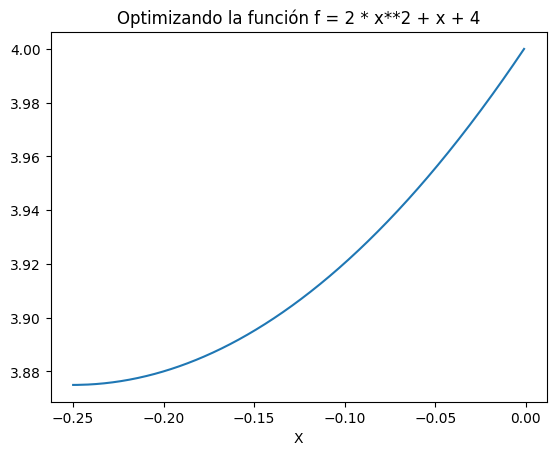

In [ ]:
learning_rate=[0.1,0.01,0.001]

# Loop de optimización
for l in learning_rate:
    # Definir la variable que será el parámetro a optimizar
    x = torch.tensor([0.0], requires_grad=True)
    # Acumuladores que usaremos para guardar los valores sucesivos de x, y
    f_values = []
    x_values = []
    optimizer = torch.optim.SGD([x], lr=l)

    for i in range(2000):
        # Setemos en 0 los gradientes de todos los elementos
        optimizer.zero_grad()
        # Pasada forward: ejecutar la función a minimizar
        f = 2*(x**2) + x + 4
        # Pasada backward: computar los gradientes
        f.backward()
        # Actualizar los pesos dando un paso de gradiente descendiente
        optimizer.step()
        # Guardar los valores para luego plotearlos
        f_values.append(f.data.item())
        x_values.append(x.data.item())

    x_np=np.array(x_values)
    target_value=-0.25
    tolerance=0.0001
    iteraciones = np.where(np.isclose(x_values, target_value, atol=tolerance))[0]
    print('Con un learning rate de %g, el optimizador converge en %d iteraciones' % (l, min(iteraciones)))

# Ploteo los valores
plt.title("Optimizando la función f = 2 * x**2 + x + 4")
plt.xlabel("X")
plt.plot(x_values,f_values)

Como podemos observar en el gráfico anterior, el valor converge a -0.25, es decir $ −\frac{1}{4}$.

Al realizar cross validación sobre los learning rates (considerando como candidatos a 0.1, 0.01 y 0.001), podemos observar que, en el primer caso, la convergencia al mínimo real se logra en tan solo 15 iteraciones, mientras que en los otros dos casos son necesarias 191 y 1945 iteraciones, respectivamente, por lo que un learning rate de 0.1 resulta conveniente para este problema.

#### Punto 2

Contamos con una base de datos de 252 mediciones del porcentaje de grasa corporal de 252 personas diferentes, el cual puede ser estimado mediante otras características, como la edad, el peso, y mediciones en diferentes partes del cuerpo. A partir de estos datos se pretende desarrollar un sistema que permita predecir dicho porcentaje a partir de las características.

[1]: Olson, R.S., La Cava, W., Orzechowski, P. et al. PMLB: a large benchmark suite for machine learning evaluation and comparison. BioData Mining 10, 36 (2017). https://epistasislab.github.io/pmlb/profile/560_bodyfat.html

Instalamos el paquete de Python que contiene la base de datos:

In [ ]:
pip install pmlb

Importamos los datos y observamos las variables predictoras del set de datos. La variable target es el porcentaje de grasa corporal, que es la variable de salida de nuestro modelo.

In [ ]:
from pmlb import fetch_data

# Importamos el dataset
body_fat = fetch_data('560_bodyfat')
body_fat.describe()

# Extraigo los datos (features) y los porcentajes (etiquetas a predecir)
data = body_fat.loc[:, body_fat.columns != 'target'].to_numpy()
percentages = body_fat.loc[:, body_fat.columns == 'target'].to_numpy()

data = data.astype(np.float32)
percentages = percentages.astype(np.float32)


Observamos cómo está conformado el dataset:

In [ ]:
body_fat.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23.0,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000,12.300000
1,1.0853,22.0,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001,6.100000
2,1.0414,22.0,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000,25.299999
3,1.0751,26.0,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001,10.400000
4,1.0340,24.0,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001,28.700001


Graficamos el histograma:

Text(0.5, 1.0, 'Histograma del Porcentaje de Grasa Corporal')

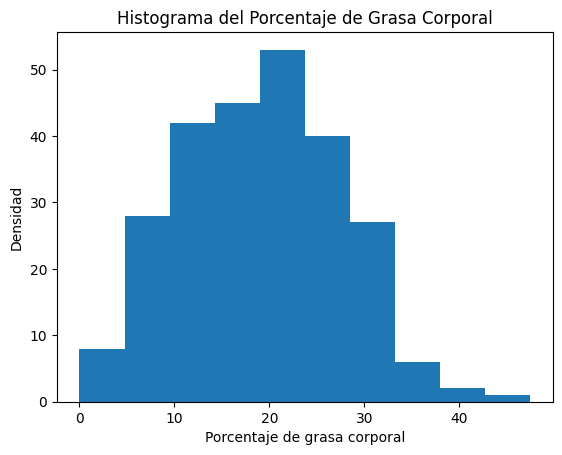

In [ ]:
plt.hist(body_fat['target'])
plt.xlabel('Porcentaje de grasa corporal')
plt.ylabel('Densidad')
plt.title("Histograma del Porcentaje de Grasa Corporal")

Ahora, particionamos el dataset en Train y Test:

In [ ]:
from sklearn.model_selection import train_test_split

# Particiono los datos en entrenamiento y prueba usando el método de scikit-learn
X_train, X_test, y_train, y_test = train_test_split(data, percentages, test_size=0.33, random_state=42)

Luego, convertimos los datos de numpy a tensores de PyTorch:

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

Ahora implementaremos en PyTorch tres Perceptrones multicapa que usaremos como regresores del porcentaje de grasa corporal (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

En cada caso, el perceptrón cuenta con 3 capas:
- Las dos primeras con 2, 10 o 200 neuronas, y función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al porcentaje de grasa corporal estimado de la persona, sin función de activación.

Definimos el tamaño del batch en 32 y la tasa de aprendizaje 0.001. Guardaremos los valores que toma la función de pérdida en cada iteración y las predicciones de cada modelo para luego graficar

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

class Net(torch.nn.Module):
    def __init__(self, input_features, n_hidden, n_output): # Incluimos como parámetro de entrada la cantidad de capas ocultas
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_features, n_hidden)
        self.hidden2 = nn.Linear(n_hidden, n_hidden)
        self.out = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

Para facilitar luego código, creamos una función para evaluar los modelos y calcular el error:

In [ ]:
# Función de evaluación
def eval_modelo(model, X_train, y_train, X_test, y_test):
    model.eval()  # Seteamos el modo evaluación
    with torch.no_grad():  # Desactivamos el cálculo de gradientes
        pred_train = model(X_train)
        train_error = criterion(pred_train, y_train) # Error en train
        pred_test = model(X_test)
        test_error = criterion(pred_test, y_test) # Error en test

    return train_error.item(), test_error.item(), pred_train, pred_test

Entrenamos los modelos y calculamos los errores. A su vez, guardamos los resultados de las predicciones para poder realizar los gráficos luego:

In [ ]:
# Parámetros de entrenamiento
neuronas = [2, 10, 200]
num_epochs = 5000
batch = 32
learning_rate = 0.001
resultados = {}

# Bucle para recorrer los 3 modelos inicializando las variables y listas.
for i in neuronas:
    net = Net(X_train_tensor.shape[1], i, 1)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    criterion = nn.MSELoss(reduction='mean')
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    loader = DataLoader(dataset=dataset, batch_size=batch, shuffle=True)
    loss_list = []

    # Bucles para recorrer cada epoca y entrenar la red
    for epoca in range(num_epochs):
        for x, y in loader:
            optimizer.zero_grad()
            output = net(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())

    # Calculamos el error en train y test y guardamos los resultados
    train_error, test_error, pred_train, pred_test = eval_modelo(net, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

    resultados[i] = {
        'model': net,
        'train_error': train_error,
        'test_error': test_error,
        'loss_list': loss_list,
        'predictions_train': pred_train,
        'predictions_test': pred_test
    }

Observamos como evoluciona la función de pérdida con las iteraciones en el entrenamiento, en cada uno de los tres modelos:

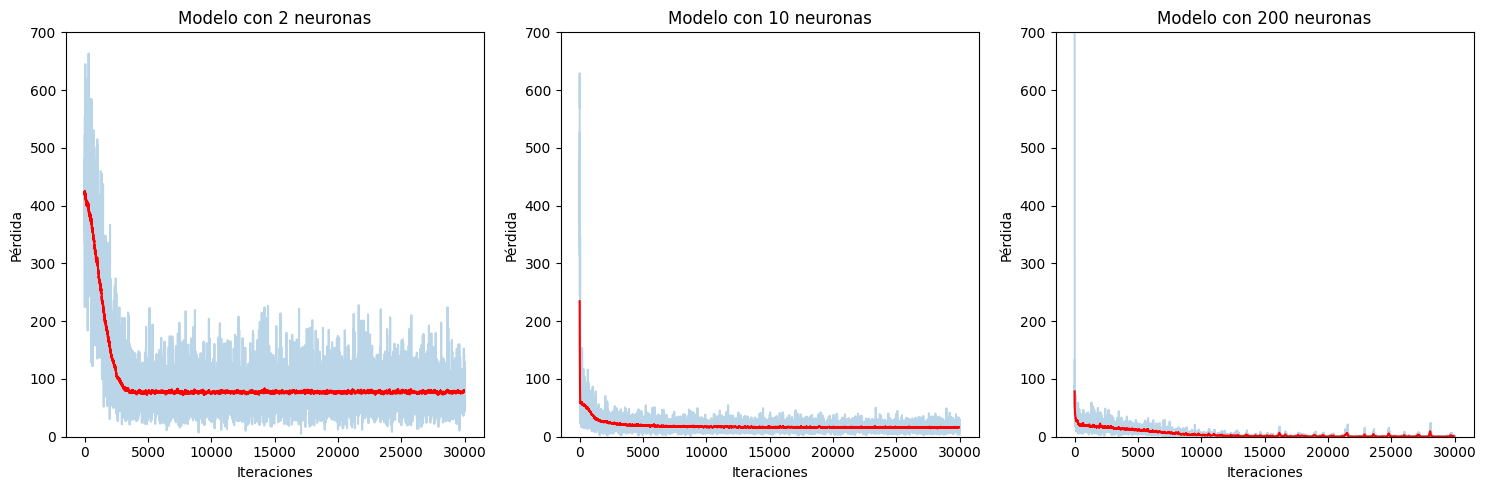

In [ ]:
plt.figure(figsize=(15, 5))

for index, i in enumerate(neuronas):
    plt.subplot(1, len(neuronas), index + 1) # Configuracion de los subplots
    loss_array = np.array(resultados[i]['loss_list'])
    plt.plot(loss_array, alpha=0.3)
    N = 60
    avg_loss = np.convolve(loss_array, np.ones((N,))/N, mode='valid')
    # Graficos
    plt.plot(avg_loss, color='red')
    plt.title(f"Modelo con {i} neuronas")
    plt.xlabel("Iteraciones")
    plt.ylabel("Pérdida")
    plt.gca().set_ylim([0,700])
plt.tight_layout()
plt.show()

Definimos una funcion para armar los scatterplot

In [ ]:
from sklearn.linear_model import LinearRegression

# Método para mostrar las predicciones como un scatter plot y graficar la recta de regresión
def plotScatter(ax, x_data, y_data, title, fit_line=True):
    ax.scatter(x_data, y_data)
    ax.set_xlabel('Valor real')
    ax.set_ylabel('Predicción')
    ax.set_title(title)

    if fit_line:
        X, Y = x_data.reshape(-1, 1), y_data.reshape(-1, 1)
        reg = LinearRegression().fit(X, Y)
        ax.plot(X, reg.predict(X), color='red')

Observamos los valores reales de Y versus las predicciones de cada modelo, tanto en los datos de train como los de test. Calculamos el MSE en cada caso y lo representamos en un barplot:

Modelo con 2 neuronas: MSE medio en training: 77.30474090576172, MSE medio en test: 56.115692138671875


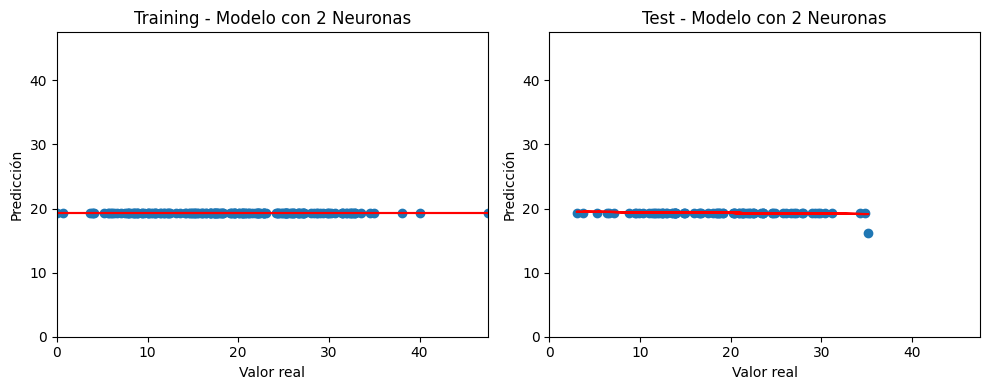

Modelo con 10 neuronas: MSE medio en training: 17.4694881439209, MSE medio en test: 20.882844924926758


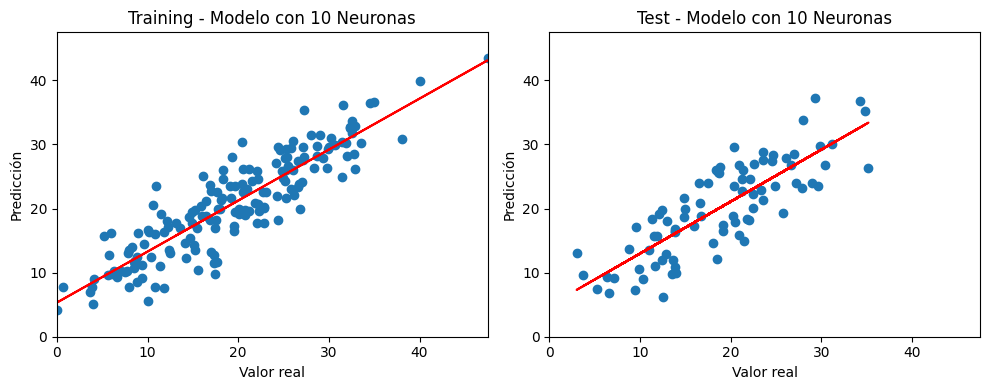

Modelo con 200 neuronas: MSE medio en training: 0.3534517288208008, MSE medio en test: 36.78911590576172


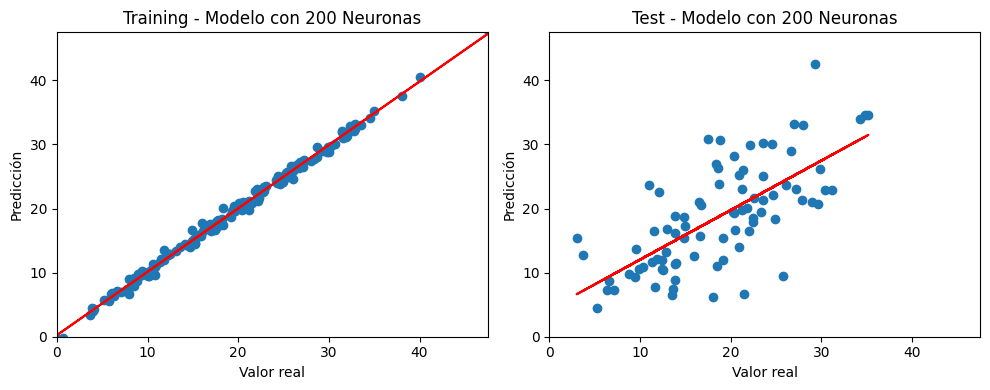

In [ ]:
# Para almacenar los errores
train_errors = []
test_errors = []
neuronas = [2, 10, 200]

# Calculamos los valores mínimos y máximos globales
global_min = min(y_train_tensor.min(), y_test_tensor.min())
global_max = max(y_train_tensor.max(), y_test_tensor.max())

# Iteramos sobre cada modelo y armamos los gráficos para datos de entrenamiento y test
for i in neuronas:
  model = resultados[i]['model']
  # Obtener errores y predicciones
  train_error, test_error, pred_train, pred_test = eval_modelo(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
  train_errors.append(train_error)
  test_errors.append(test_error)
  print(f"Modelo con {i} neuronas: MSE medio en training: {train_error}, MSE medio en test: {test_error}")

  # Graficos
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))
  plotScatter(axs[0], y_train_tensor.numpy(), pred_train.numpy(), f"Training - Modelo con {i} Neuronas")
  plotScatter(axs[1], y_test_tensor.numpy(), pred_test.numpy(), f"Test - Modelo con {i} Neuronas")
  axs[0].set_xlim(global_min, global_max)
  axs[0].set_ylim(global_min, global_max)
  axs[1].set_xlim(global_min, global_max)
  axs[1].set_ylim(global_min, global_max)

  plt.tight_layout()
  plt.show()

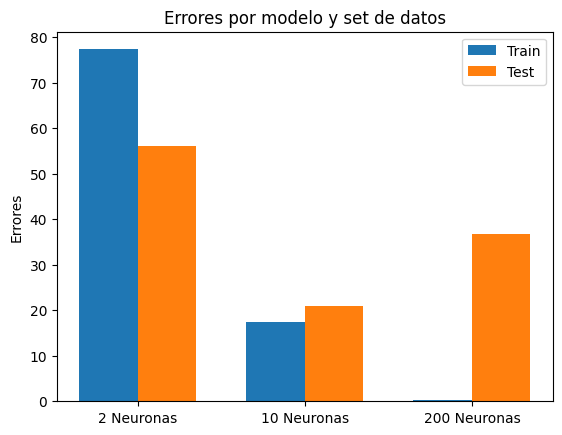

In [ ]:
# Configuraciones del gráfico
labels = [f'{n} Neuronas' for n in neuronas]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

# Gráfico
rects1 = ax.bar(x - width/2, train_errors, width, label='Train')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test')
ax.set_ylabel('Errores')
ax.set_title('Errores por modelo y set de datos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Como se puede observar en el modelo con 200 neuronas la función de pérdida disminuye más rápidamente con las iteraciones en el entrenamiento. Sin embargo, este modelo presenta overfitting para los datos de entrenamiento, ya que ajusta muy bien estos datos, pero tiene un alto valor de MSE en los datos de test.

El modelo con 2 neuronas hace la misma predicción para todas las observaciones y arroja un valor cercano a la media de la variable de respuesta del dataset de entrenamiento:

In [ ]:
#Calculamos el valor medio de la etiqueta en la muestra de entrenamiento
np.mean(y_train)

19.38274

In [ ]:
print(resultados[2]['predictions_train'])
print(resultados[2]['predictions_test'])

tensor([[19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.3680],
        [19.

Esto puede deberse a que es un modelo muy simple y es posible que esté realizando las predicciones basandose en el promedio de los valores de respuesta con los que se entrenó. Esto implica, naturalmente, errores muy grandes.

Por último, vemos que el modelo con menor error, tanto en datos de train como en test, es el modelo con 10 neuronas, por lo tanto, este modelo es el que elegiríamos para predecir el porcentaje de grasa corporal.